In [0]:
## Author - Sathya Somu
## This program creates EDA (exploratory data analysis) for the text / captions

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from collections import Counter 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#The seed() is one of the methods in Python's random module. It initializes the pseudorandom number generator. 
#You should call it before generating the random number. If you use the same seed to initialize, then the random output will remain the same
def set_seed(sd=123):
  from tensorflow import set_random_seed
  import random as rn
  #numpy random seed
  seed(sd)
    ## core python's random number 
  rn.seed(sd)
    ## tensor flow's random number
  set_random_seed(sd)

In [0]:
#import the data from Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
## The location of the caption file
dir_Flickr_text = "gdrive/My Drive/key_caption_master_final_12.txt"   # This is hardcoded now. File name of key_caption needs to be changed based on file name


In [0]:
#To open the file in read mode and to read the file and copy the contents as a data "text"
file = open(dir_Flickr_text,'r')
text = file.read()
file.close()

#creating an empty data frame and Load the text data and save it into a panda dataframe df_txt.
 
datatxt = []
for line in text.split('\n'):
    col = line.split('|')
    if len(col) == 1:
        continue
    w = col[0].split("#")
    datatxt.append(w + [col[1].lower()])


#filename : jpg file name
#index : unique ID for each caption for the same image
#caption : string of caption, all in lower case

df_txt = pd.DataFrame(datatxt,columns=["filename","caption"])
df_txt['caption'] = df_txt['caption'].str.replace(r'[^\w\s]+', '')
df_txt.head(2)
uni_filenames = np.unique(df_txt.filename.values)
print("The number of unique file names : {}".format(len(uni_filenames)))
print("The distribution of the number of captions for each image:")
Counter(Counter(df_txt.filename.values).values())

The number of unique file names : 24281
The distribution of the number of captions for each image:


Counter({1: 7882, 2: 1, 4: 2, 5: 16393, 6: 2, 10: 1})

In [0]:
df_txt.head()

,filename,caption
0,GCC2001300726337516.jpg,homelistedoctoberauthorperson who are expecti...
1,GCC2001300726341081.jpg,vector sethand drawn illustration decorative...
2,GCC200130072635457.jpg,country artist meets her fans onboard ship
3,GCC2001300726384579.jpg,latin pop artist kissesfan on stage during co...
4,GCC200130072638799.jpg,actors attendworld premiere


In [0]:
# To create a new dataframe dfword to visualize the frequency of words .It contains word and it is frequency on the entire dataset

def df_word(df_txt):
    vocabulary = []
    #for each word in caption
     #   if value is not None:
    for txt in df_txt.caption.values:
        if txt is not None:
#extend iterates over its argument and adding each element to the list and extending the list. The length of the list increases by number of elements in it’s argument.
         vocabulary.extend(txt.split())
    print('Vocabulary Size: %d' % len(set(vocabulary)))
#A Counter is a subclass of dict. Therefore it is an unordered collection where elements and their respective count are stored as dictionary.
#Convert dict to dataframe with word and count
    ct = Counter(vocabulary)
    dfwor= pd.DataFrame({'word':list(ct.keys()),'count':list(ct.values())})
    dfword=pd.DataFrame()
    dfword =dfword.append(dfwor,ignore_index="true")

    dfword.sort_values('count',ascending=False,inplace=True)
    dfword = dfword.reset_index()[['word','count']]
    return(dfword)
#Displaying the count of words
dfword = df_word(df_txt)
dfword.head(3)

Vocabulary Size: 69224


,word,count
0,man,11935
1,are,8338
2,dog,8050


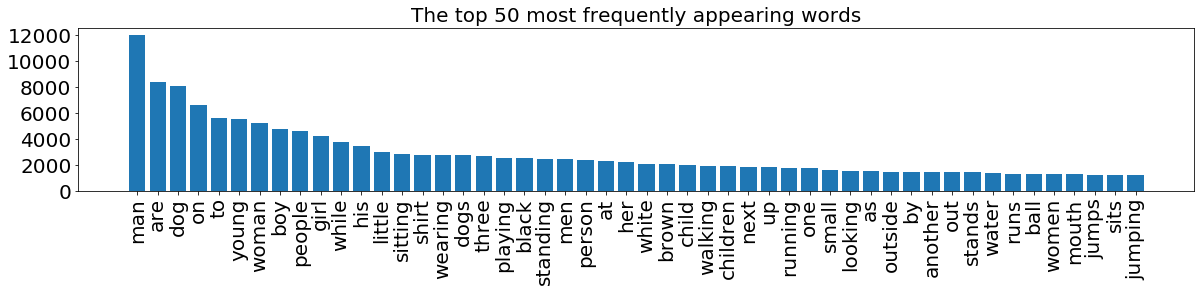

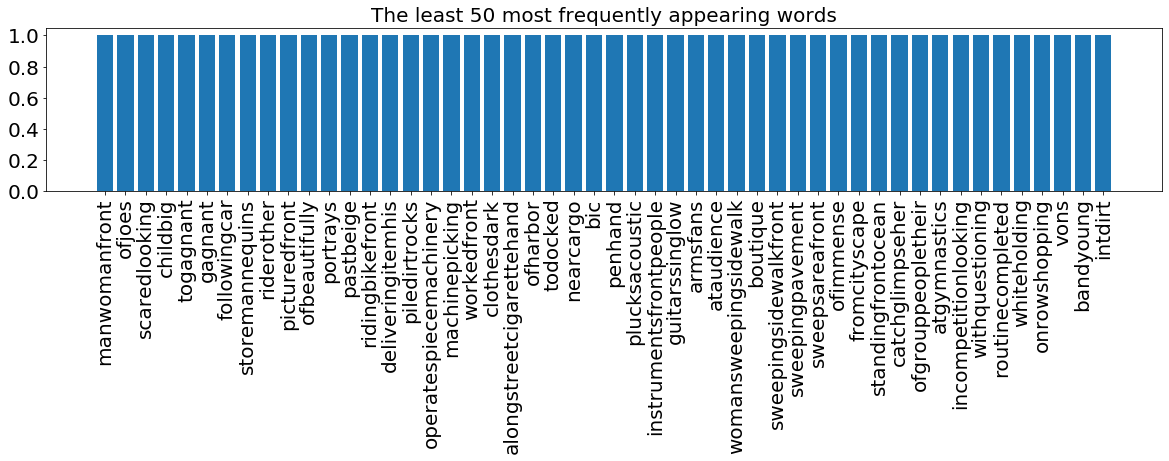

In [0]:
topn = 50
# Function to display the frequency of words with the count in y axis and word in x axis
def plthist(dfsub, title="The top 50 most frequently appearing words"):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

plthist(dfword.iloc[:topn,:],
        title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 50 most frequently appearing words")

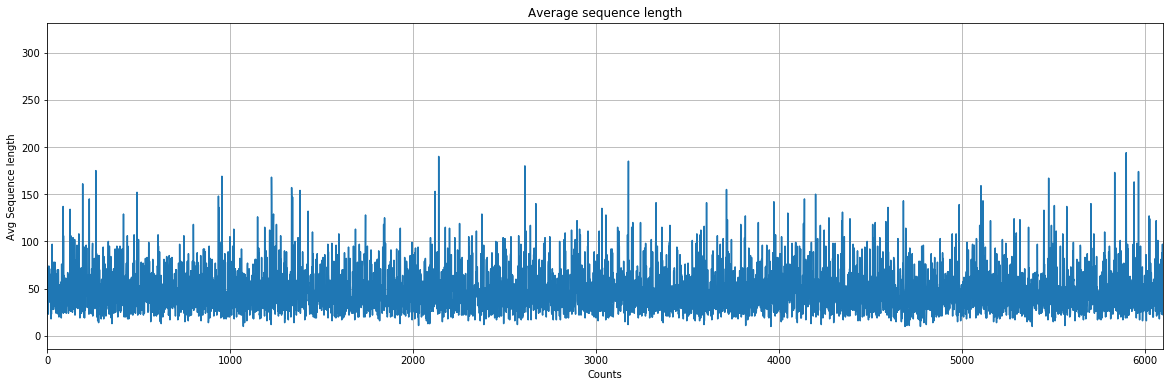

In [0]:
# displaying the average length of the sequence
dfword["avg_len"]=df_txt['caption'].str.len()
dfword["avg_len"].plot(figsize=(20,6),grid=True,xlim=(0,6100))
plt.title("Average sequence length")
plt.ylabel("Avg Sequence length")
plt.xlabel("Counts")
plt.show()

In [0]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python

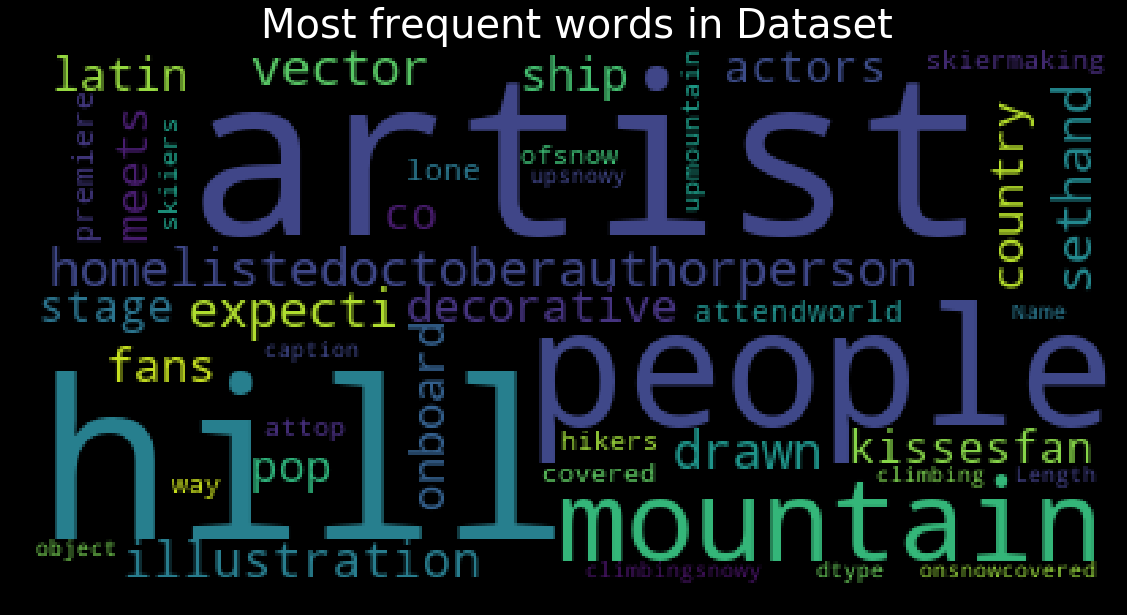

In [0]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud()
# generate word cloud using text column
wc.generate(str(df_txt['caption']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in Dataset", fontsize=40,color='white')
plt.imshow(wc)
plt.show()